In [37]:
import IPython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [38]:
data = pd.read_csv('FINAL_KA.csv')

In [39]:
data

,State,District,Year,Crop,Season,Yield,Soil_Mois,Soil_Temp
0,Karnataka,Bagalkot,2015,Arhar_Tur,Kharif,0.28,67,23.57
1,Karnataka,Bagalkot,2015,Arhar_Tur,Rabi,0.18,63,25.93
2,Karnataka,Bagalkot,2015,Bajra,Kharif,0.55,65,25.03
3,Karnataka,Bagalkot,2015,Bajra,Rabi,0.11,66,24.04
4,Karnataka,Bagalkot,2015,Castor_Seed,Kharif,0.11,65,23.57
...,...,...,...,...,...,...,...,...
9153,Karnataka,Chikballapur,2022,Soyabean,Rabi,1.52,63,25.93
9154,Karnataka,Chikballapur,2022,Sunflower,Kharif,0.98,70,23.57
9155,Karnataka,Chikballapur,2022,Sunflower,Rabi,0.87,66,24.04
9156,Karnataka,Chikballapur,2022,Urad,Kharif,0.47,70,23.57


In [40]:
data.tail(5)

,State,District,Year,Crop,Season,Yield,Soil_Mois,Soil_Temp
9153,Karnataka,Chikballapur,2022,Soyabean,Rabi,1.52,63,25.93
9154,Karnataka,Chikballapur,2022,Sunflower,Kharif,0.98,70,23.57
9155,Karnataka,Chikballapur,2022,Sunflower,Rabi,0.87,66,24.04
9156,Karnataka,Chikballapur,2022,Urad,Kharif,0.47,70,23.57
9157,Karnataka,Chikballapur,2022,Urad,Rabi,0.53,73,24.58


In [41]:
data.shape

(9158, 8)

In [42]:
data.columns

Index(['State', 'District', 'Year', 'Crop', 'Season', 'Yield', 'Soil_Mois',
       'Soil_Temp'],
      dtype='object')

In [43]:
data.duplicated().sum()

0

In [44]:
data.isnull().sum()

State        0
District     0
Year         0
Crop         0
Season       0
Yield        0
Soil_Mois    0
Soil_Temp    0
dtype: int64

In [45]:
#data['Soil_Mois'] = pd.to_numeric(data['Soil_Mois'], errors='coerce')
#data['Soil_Temp'] = pd.to_numeric(data['Soil_Temp'], errors='coerce')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9158 entries, 0 to 9157
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      9158 non-null   object 
 1   District   9158 non-null   object 
 2   Year       9158 non-null   int64  
 3   Crop       9158 non-null   object 
 4   Season     9158 non-null   object 
 5   Yield      9158 non-null   float64
 6   Soil_Mois  9158 non-null   int64  
 7   Soil_Temp  9158 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 572.5+ KB


Text(0.5, 1.0, 'Yeild of different crops')

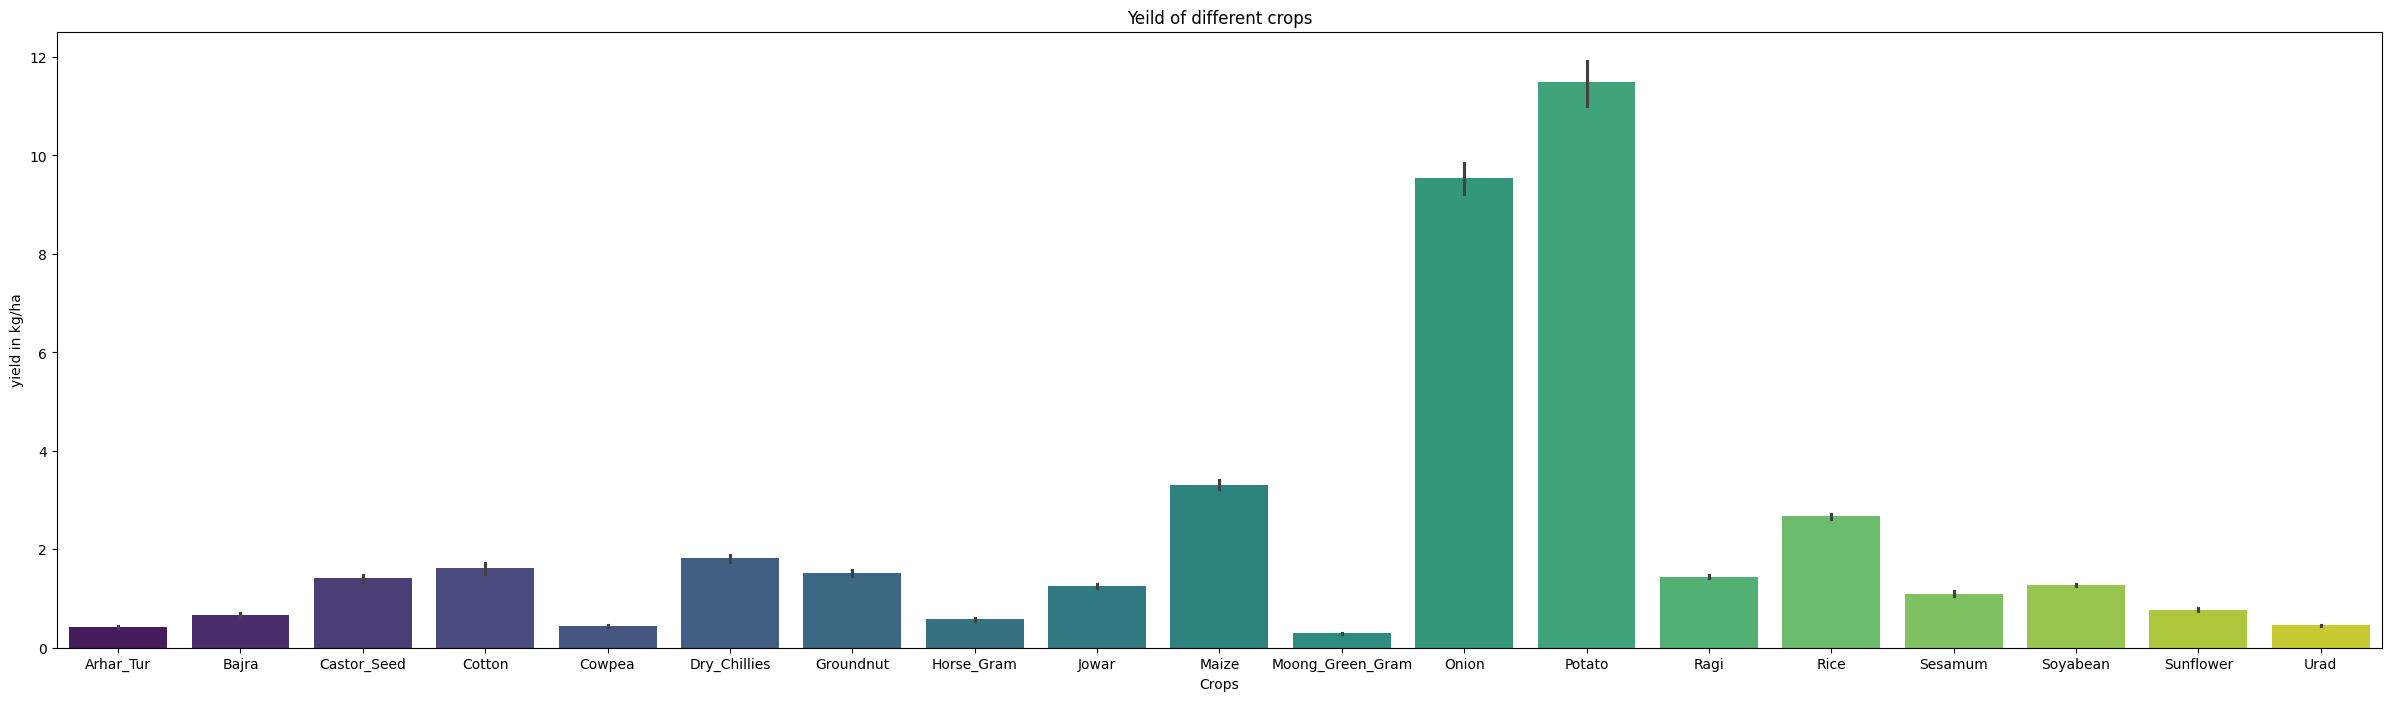

In [47]:
plt.figure(figsize=(30, 8))
sns.barplot(x='Crop', y='Yield', data=data, palette='viridis')
plt.xlabel('Crops')
plt.ylabel('yield in kg/ha')
plt.title('Yeild of different crops')


In [48]:
data.nunique()

State          1
District      31
Year           8
Crop          19
Season         2
Yield        818
Soil_Mois      7
Soil_Temp      8
dtype: int64

In [49]:
data['Crop'].unique()

array(['Arhar_Tur', 'Bajra', 'Castor_Seed', 'Cotton', 'Cowpea',
       'Dry_Chillies', 'Groundnut', 'Horse_Gram', 'Jowar', 'Maize',
       'Moong_Green_Gram', 'Onion', 'Potato', 'Ragi', 'Rice', 'Sesamum',
       'Soyabean', 'Sunflower', 'Urad'], dtype=object)

In [50]:
data['Crop'].value_counts()

Crop
Arhar_Tur           482
Moong_Green_Gram    482
Sunflower           482
Soyabean            482
Sesamum             482
Rice                482
Ragi                482
Potato              482
Onion               482
Maize               482
Bajra               482
Jowar               482
Horse_Gram          482
Groundnut           482
Dry_Chillies        482
Cowpea              482
Cotton              482
Castor_Seed         482
Urad                482
Name: count, dtype: int64

In [51]:
'''crop_summary = pd.pivot_table(data, index=['label'], aggfunc='mean')
crop_summary'''

"crop_summary = pd.pivot_table(data, index=['label'], aggfunc='mean')\ncrop_summary"

In [52]:
import plotly.express as px

fig = px.box(data, y='Yield', points='all')
fig.show()

In [53]:
'''import plotly.express as px

fig = px.box(data, y='Soil_Mois', points='all')
fig.show()'''

"import plotly.express as px\n\nfig = px.box(data, y='Soil_Mois', points='all')\nfig.show()"

In [54]:
import plotly.express as px

fig = px.box(data, y='Soil_Temp', points='all')
fig.show()

#REMOVE OUTLIERS FROM DATASET

In [55]:
'''df_boston = data
df_boston.columns = df_boston.columns
df_boston.head()

print("old shape", df_boston.shape)

import numpy as np
import pandas as pd


columns = ['Yield', 'Soil_Mois', 'Soil_Temp']

outliers_indices = set()

for col in columns:
    Q1 = np.percentile(df_boston[col], 25, interpolation='midpoint')
    Q3 = np.percentile(df_boston[col], 75, interpolation='midpoint')
    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    upper_outliers = np.where(df_boston[col] >= upper_bound)[0]
    lower_outliers = np.where(df_boston[col] <= lower_bound)[0]

    outliers_indices.update(upper_outliers)
    outliers_indices.update(lower_outliers)

df_boston.drop(list(outliers_indices), inplace=True)

print("New shape:", data.shape)'''

'df_boston = data\ndf_boston.columns = df_boston.columns\ndf_boston.head()\n\nprint("old shape", df_boston.shape)\n\nimport numpy as np\nimport pandas as pd\n\n\ncolumns = [\'Yield\', \'Soil_Mois\', \'Soil_Temp\']\n\noutliers_indices = set()\n\nfor col in columns:\n    Q1 = np.percentile(df_boston[col], 25, interpolation=\'midpoint\')\n    Q3 = np.percentile(df_boston[col], 75, interpolation=\'midpoint\')\n    IQR = Q3 - Q1\n\n    upper_bound = Q3 + 1.5 * IQR\n    lower_bound = Q1 - 1.5 * IQR\n\n    upper_outliers = np.where(df_boston[col] >= upper_bound)[0]\n    lower_outliers = np.where(df_boston[col] <= lower_bound)[0]\n\n    outliers_indices.update(upper_outliers)\n    outliers_indices.update(lower_outliers)\n\ndf_boston.drop(list(outliers_indices), inplace=True)\n\nprint("New shape:", data.shape)'

In [56]:
#data = df_boston

In [57]:
'''figure = px.bar(crop_summary_new, x='label', y='N')
figure.show()'''

"figure = px.bar(crop_summary_new, x='label', y='N')\nfigure.show()"

In [58]:
data

,State,District,Year,Crop,Season,Yield,Soil_Mois,Soil_Temp
0,Karnataka,Bagalkot,2015,Arhar_Tur,Kharif,0.28,67,23.57
1,Karnataka,Bagalkot,2015,Arhar_Tur,Rabi,0.18,63,25.93
2,Karnataka,Bagalkot,2015,Bajra,Kharif,0.55,65,25.03
3,Karnataka,Bagalkot,2015,Bajra,Rabi,0.11,66,24.04
4,Karnataka,Bagalkot,2015,Castor_Seed,Kharif,0.11,65,23.57
...,...,...,...,...,...,...,...,...
9153,Karnataka,Chikballapur,2022,Soyabean,Rabi,1.52,63,25.93
9154,Karnataka,Chikballapur,2022,Sunflower,Kharif,0.98,70,23.57
9155,Karnataka,Chikballapur,2022,Sunflower,Rabi,0.87,66,24.04
9156,Karnataka,Chikballapur,2022,Urad,Kharif,0.47,70,23.57


In [59]:
'''fig, ax=plt.subplots(1,1,figsize=(20,9))
sns.heatmap(data.corr(), annot=True, cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')
plt.title('correlation between different features', fontsize=15, c='black')
plt.show()'''

"fig, ax=plt.subplots(1,1,figsize=(20,9))\nsns.heatmap(data.corr(), annot=True, cmap='Wistia')\nax.set(xlabel='features')\nax.set(ylabel='features')\nplt.title('correlation between different features', fontsize=15, c='black')\nplt.show()"

In [60]:
col = ['State', 'District', 'Year', 'Crop', 'Season', 'Soil_Mois', 'Soil_Temp', 'Yield']
data= data[col]
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
##X = data.drop('Yield', axis=1)
#y = data['Yield']

In [61]:
X

,State,District,Year,Crop,Season,Soil_Mois,Soil_Temp
0,Karnataka,Bagalkot,2015,Arhar_Tur,Kharif,67,23.57
1,Karnataka,Bagalkot,2015,Arhar_Tur,Rabi,63,25.93
2,Karnataka,Bagalkot,2015,Bajra,Kharif,65,25.03
3,Karnataka,Bagalkot,2015,Bajra,Rabi,66,24.04
4,Karnataka,Bagalkot,2015,Castor_Seed,Kharif,65,23.57
...,...,...,...,...,...,...,...
9153,Karnataka,Chikballapur,2022,Soyabean,Rabi,63,25.93
9154,Karnataka,Chikballapur,2022,Sunflower,Kharif,70,23.57
9155,Karnataka,Chikballapur,2022,Sunflower,Rabi,66,24.04
9156,Karnataka,Chikballapur,2022,Urad,Kharif,70,23.57


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True, random_state=0)

In [63]:
X_train.head()

,State,District,Year,Crop,Season,Soil_Mois,Soil_Temp
8504,Karnataka,Bijapur,2021,Sesamum,Kharif,67,25.82
6716,Karnataka,Belgaum,2015,Rice,Kharif,66,25.82
7476,Karnataka,Bellary,2018,Rice,Kharif,70,24.15
738,Karnataka,Chitradurga,2018,Jowar,Kharif,66,25.82
4379,Karnataka,Mandya,2018,Cowpea,Rabi,66,24.04


In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder()
scale = StandardScaler()
preprocesser = ColumnTransformer(
        transformers = [
            #('StandardScale', scale, [5, 6]),
            ('OHE', ohe, [0, 1, 3, 4]),
        ],
)

In [65]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [66]:
preprocesser.get_feature_names_out(col[:-1])

array(['OHE__State_Karnataka', 'OHE__District_Bagalkot',
       'OHE__District_Bangalore rural', 'OHE__District_Belgaum',
       'OHE__District_Bellary', 'OHE__District_Bengaluru urban',
       'OHE__District_Bidar', 'OHE__District_Bijapur',
       'OHE__District_Chamarajanagar', 'OHE__District_Chikballapur',
       'OHE__District_Chikmagalur', 'OHE__District_Chitradurga',
       'OHE__District_Dakshin kannad', 'OHE__District_Davangere',
       'OHE__District_Dharwad', 'OHE__District_Gadag',
       'OHE__District_Gulbarga', 'OHE__District_Hassan',
       'OHE__District_Haveri', 'OHE__District_Kodagu',
       'OHE__District_Kolar', 'OHE__District_Koppal',
       'OHE__District_Mandya', 'OHE__District_Mysore',
       'OHE__District_Raichur', 'OHE__District_Ramanagara',
       'OHE__District_Shimoga', 'OHE__District_Tumkur',
       'OHE__District_Udupi', 'OHE__District_Uttar kannad',
       'OHE__District_Vijayanagar', 'OHE__District_Yadgir',
       'OHE__Crop_Arhar_Tur', 'OHE__Crop_Bajra

In [67]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error


models = {
    'lr':LinearRegression(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor(),
    'knr':KNeighborsRegressor(),
    'rfr':RandomForestRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)
    
    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)} mse : {mean_squared_error(y_test,y_pred)} ")

lr : mae : 0.8334920228636253 score : 0.8143248393861554 mse : 2.2210221155088754 
Rid : mae : 0.8335069034350128 score : 0.8140917655333895 mse : 2.2238101146134874 
Dtr : mae : 0.4001958047411104 score : 0.914416971851337 mse : 1.0237330486317404 
knr : mae : 0.4701171761280932 score : 0.9020975284928335 mse : 1.1710966273653567 
rfr : mae : 0.39681844317159043 score : 0.9153555964719673 mse : 1.0125053430318693 


In [68]:
from sklearn.ensemble import RandomForestRegressor
regressor_rfr = RandomForestRegressor(random_state=0)
regressor_rfr.fit(X_train_dummy,y_train)
y_pred1 = regressor_rfr.predict(X_test_dummy)

In [69]:
from sklearn.metrics import mean_squared_error,r2_score
mae_rfr = mean_squared_error(y_test,y_pred1)
r2score_rfr = r2_score(y_test,y_pred1)
print("rfr model error of:", mae_rfr, "r2 score of:", r2score_rfr)

rfr model error of: 1.0109858148818132 r2 score of: 0.9154826274597944


In [70]:
def recommendations(State,District,Year,Crop,Season, Soil_Mois, Soil_Temp):
    features = np.array([[State,District,Year,Crop,Season, Soil_Mois, Soil_Temp]])
    transform_features = preprocesser.transform(features)
    prediction = regressor_rfr.predict(transform_features).reshape(1,-1)
    return prediction[0][0]

In [71]:
State = "Karnataka"
District = "Chikballapur"
Year = 2024
Crop = "Maize"
Season = "Kharif"
Soil_Mois = 30.7
Soil_Temp = 26.5

predict = recommendations(State,District,Year,Crop,Season,Soil_Mois, Soil_Temp)
print("yield in tonne/ha:",predict)

yield in tonne/ha: 2.7356671969696964


In [72]:
import pickle 
import joblib
joblib.dump(regressor_rfr, 'model_KA_yield.pkl')
joblib.dump(preprocesser, open('preprocessor_KA_yield.pkl','wb'))